# Análisis predictivo de abandono

In [108]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import plotly.express as px

import warnings

# Ignoramos warnings
warnings.filterwarnings("ignore")

In [109]:
# Importamos data
df = pd.read_csv('Customer Churn.csv')

## EDA

In [110]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [111]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [112]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [114]:
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [7]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [8]:
df.isnull().sum() #Observamos que no tenemos valores nulos

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [9]:
cat_cols = ['Complains', 'Tariff Plan', 'Status', 'Churn', 'Charge  Amount', 'Age Group'] #Variables categóricas
num_cols= [col for col in df.columns if col not in cat_cols] #Variables numéricas



['Call  Failure',
 'Subscription  Length',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age',
 'Customer Value']

In [16]:
df[cat_cols]

,Complains,Tariff Plan,Status,Churn,Charge Amount,Age Group
0,0,1,1,0,0,3
1,0,1,2,0,0,2
2,0,1,1,0,0,3
3,0,1,1,0,0,1
4,0,1,1,0,0,1
...,...,...,...,...,...,...
3145,0,2,1,0,2,2
3146,0,1,1,0,1,5
3147,0,1,1,0,4,3
3148,0,1,1,0,2,3


In [11]:
# Valores únicos en las variables categóricas

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Complains has [0 1] values

Tariff Plan has [1 2] values

Status has [1 2] values

Churn has [0 1] values

Charge  Amount has [ 0  1  2  3  8  4  9  7  5 10  6] values

Age Group has [3 2 1 4 5] values



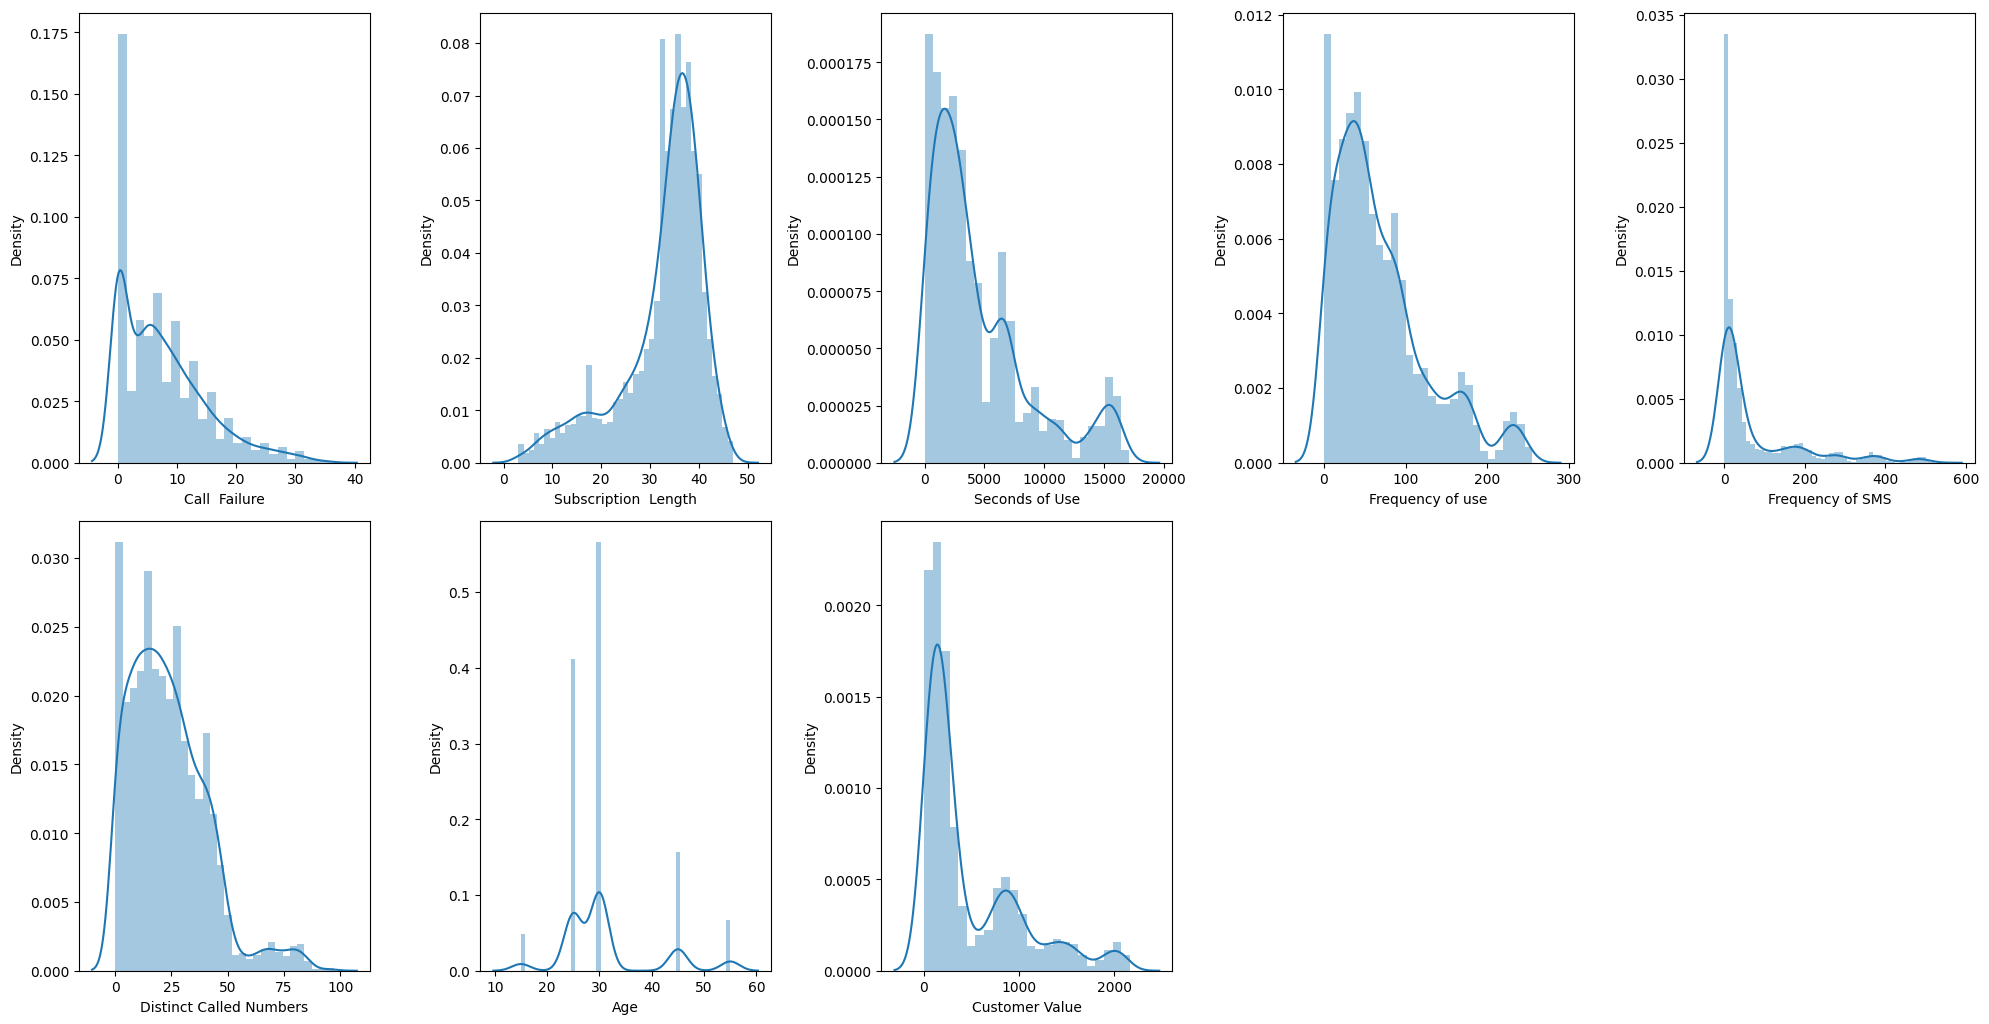

In [12]:
# Distribución de las variables numéricas

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 8:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

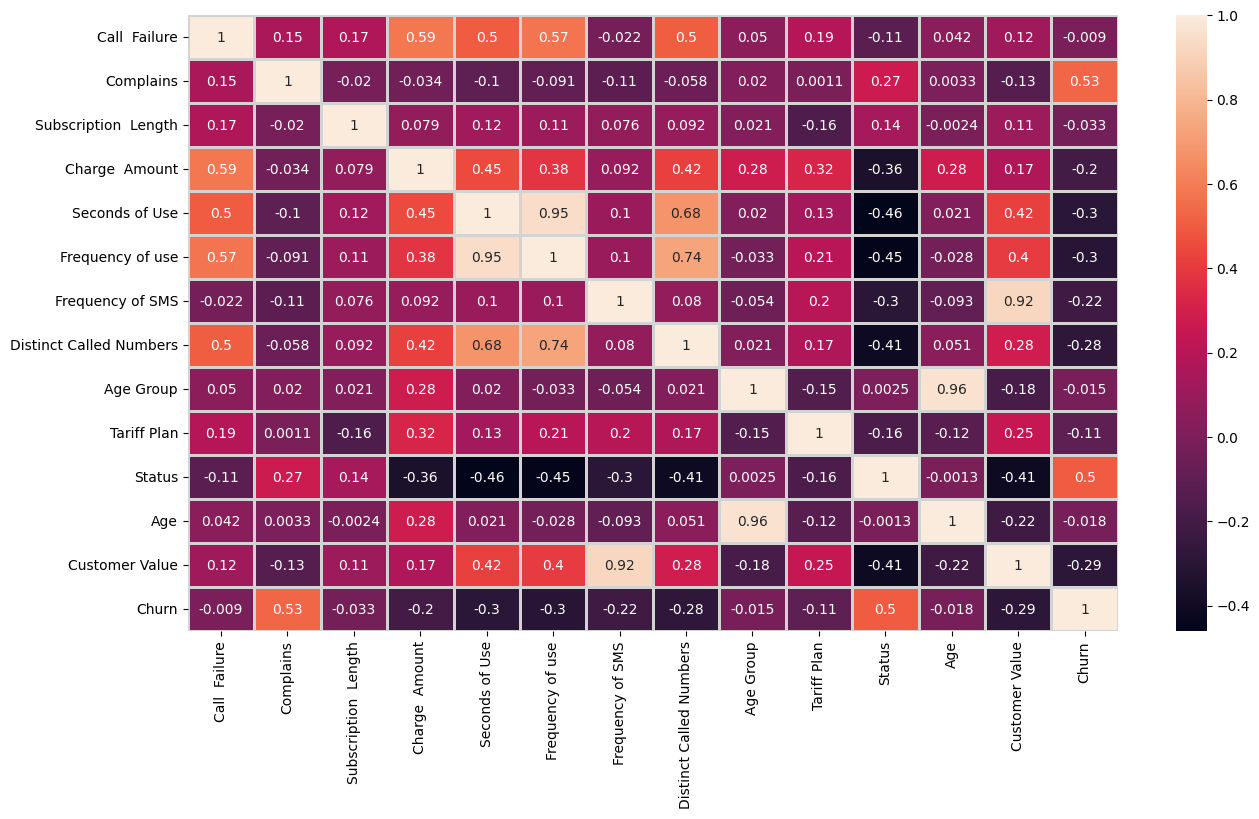

In [18]:
# Heatmap de los datos
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


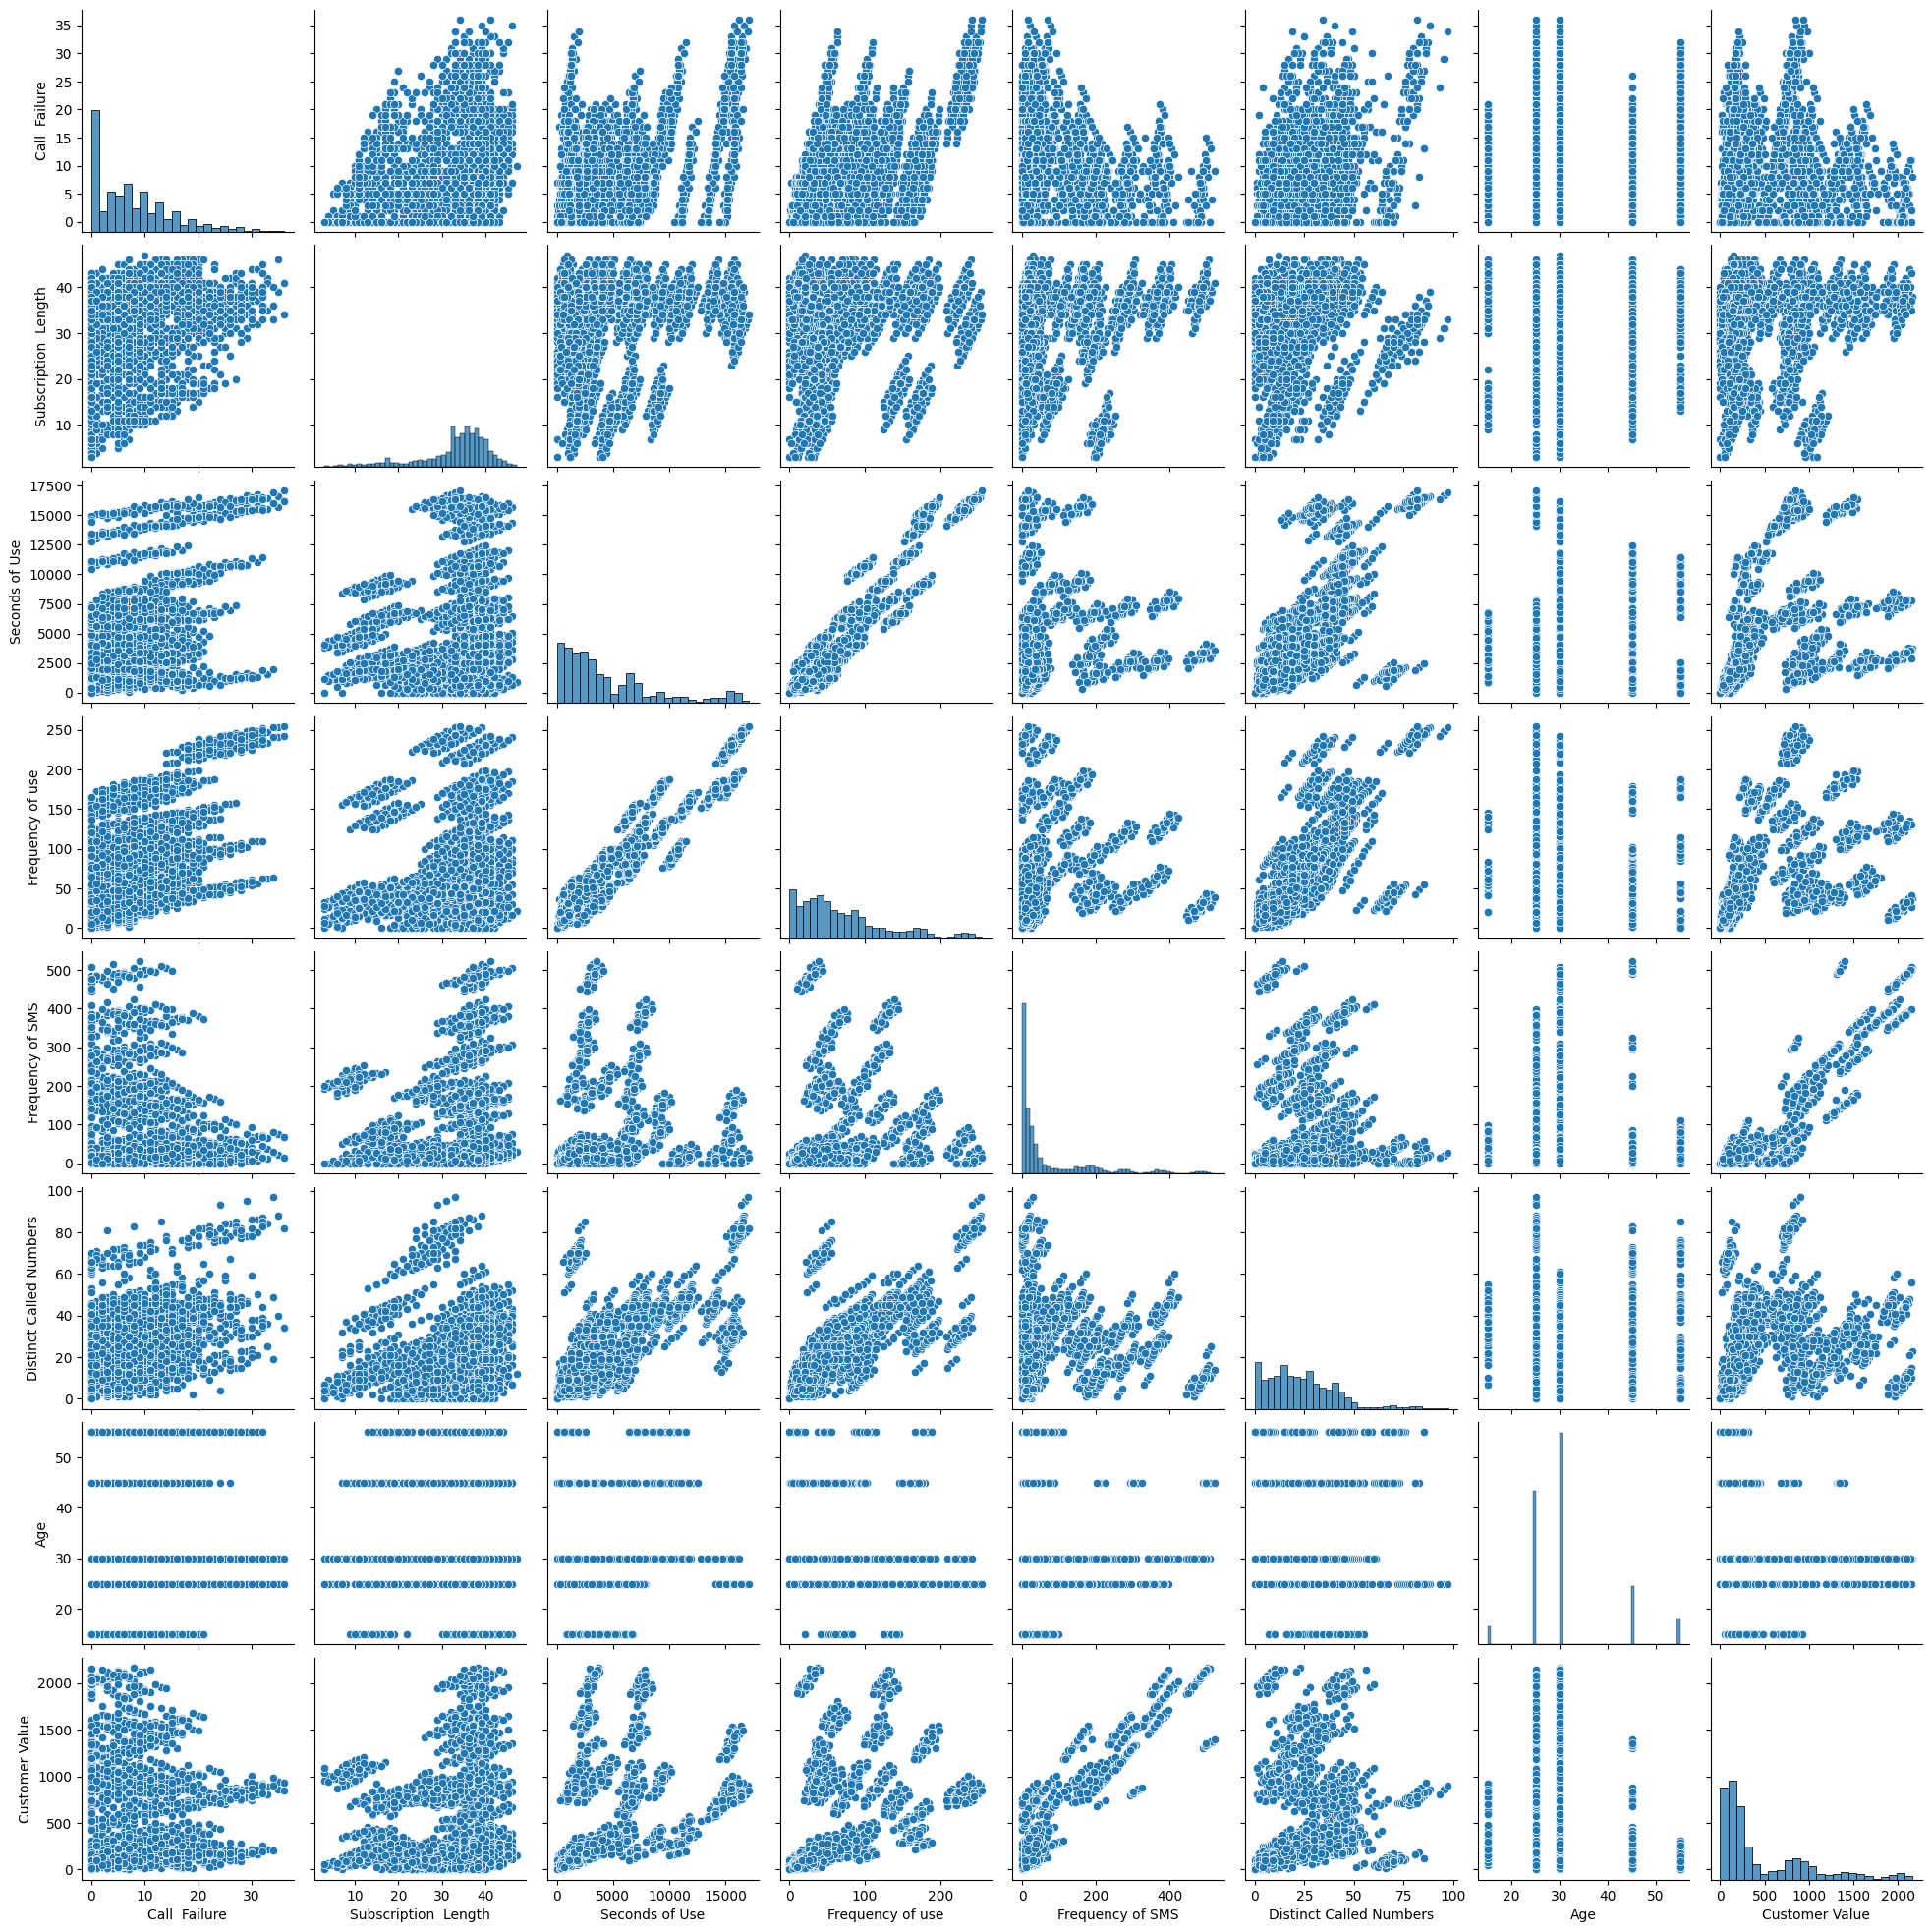

In [19]:
#Gráfico por pares
sns.pairplot(df[num_cols])

Text(0, 0.5, 'Cantidad')

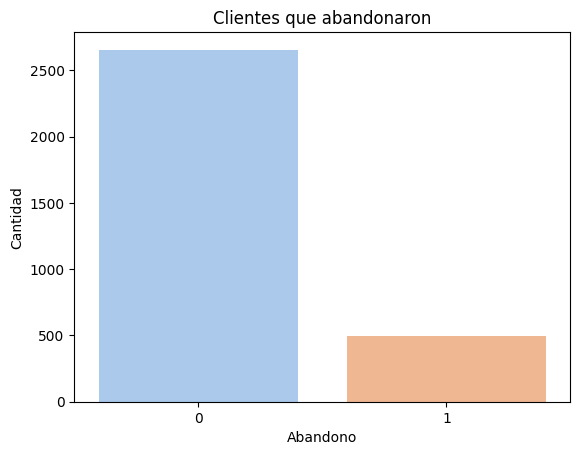

In [99]:
#Gráfica de los clientes que abandonaron
sns.countplot(x='Churn',data=df,palette='pastel')
plt.title('Clientes que abandonaron')
plt.xlabel('Abandono')
plt.ylabel('Cantidad')

Text(0.5, 1.0, 'Clientes que abandonaron por grupo de edad')

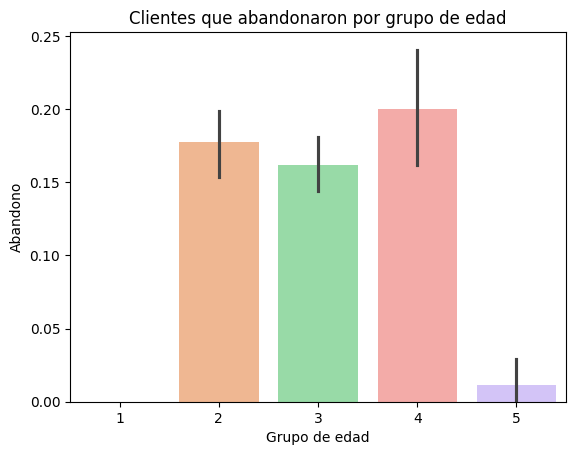

In [100]:
#Clientes que abandonaron por grupo de edad
sns.barplot(x = 'Age Group', y = 'Churn', data = df, palette='pastel')
plt.xlabel('Grupo de edad')
plt.ylabel('Abandono')
plt.title('Clientes que abandonaron por grupo de edad')

Text(0.5, 1.0, 'Clientes que abandonaron por quejas')

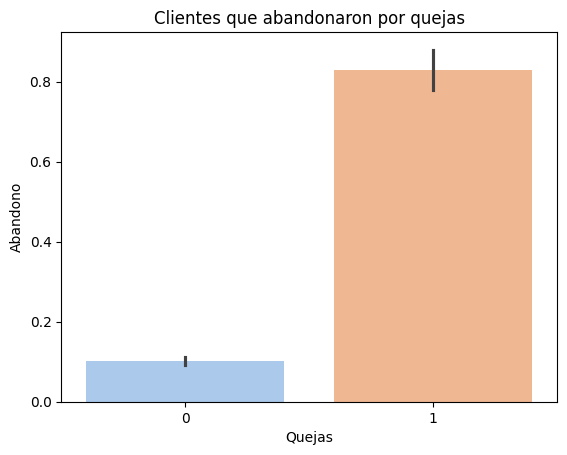

In [101]:
#Clientes que abandonaron por quejas
sns.barplot(x = 'Complains', y = 'Churn', data = df, palette='pastel')
plt.xlabel('Quejas')
plt.ylabel('Abandono')
plt.title('Clientes que abandonaron por quejas')

Text(0.5, 1.0, 'Clientes que abandonaron por monto de cargo')

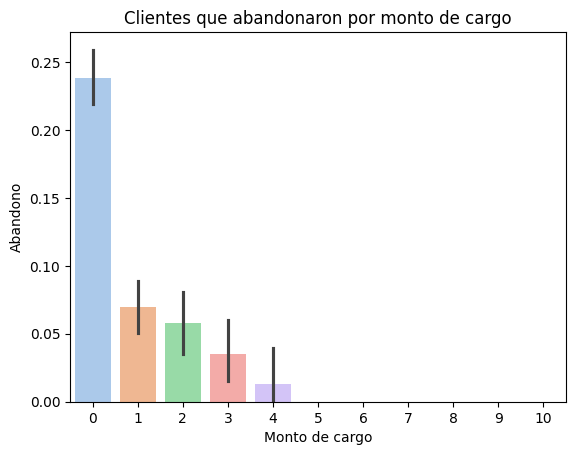

In [102]:
#Clientes que abandonaron por el monto de cargo
sns.barplot(x = 'Charge  Amount', y = 'Churn', data = df, palette='pastel')
plt.xlabel('Monto de cargo')
plt.ylabel('Abandono')
plt.title('Clientes que abandonaron por monto de cargo')

Text(0.5, 1.0, 'Clientes que abandonaron por el plan de tarifa')

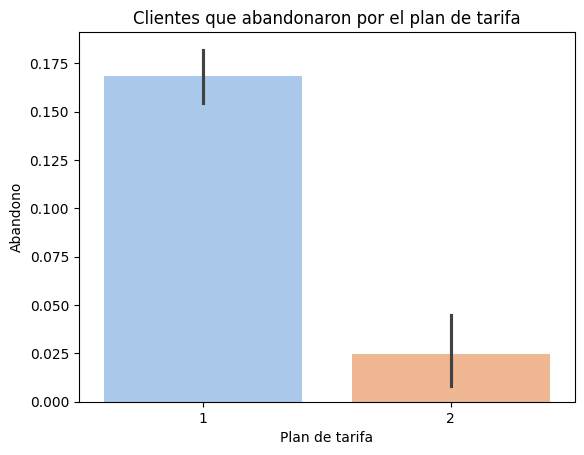

In [103]:
#Clientes que abandonaron por el plan de tarifa
sns.barplot(x = 'Tariff Plan', y = 'Churn', data = df, palette='pastel')
plt.xlabel('Plan de tarifa')
plt.ylabel('Abandono')
plt.title('Clientes que abandonaron por el plan de tarifa')

Text(0.5, 1.0, 'Clientes que abandonaron por status')

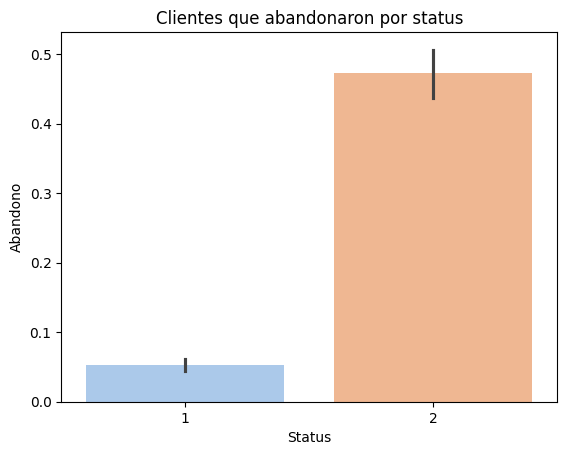

In [104]:
#Clientes que abandonaron por status
sns.barplot(x = 'Status', y = 'Churn', data = df, palette='pastel')
plt.xlabel('Status')
plt.ylabel('Abandono')
plt.title('Clientes que abandonaron por status')

In [34]:
# Definimos funciones para graficar

def violin(col):
    fig = px.violin(df, y=col, x="Churn", color="Churn", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="Churn", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()


In [35]:
violin('Seconds of Use')

In [36]:
violin("Frequency of use")

In [37]:
violin("Frequency of SMS")

In [38]:
violin("Distinct Called Numbers")

In [39]:
violin("Customer Value")

## MODEL TRAINING

In [79]:

X = df.drop(["Churn", "Call  Failure", "Age Group", "Age"], axis = "columns") #Estas variables son irrelevantes ya que tienen muy poca correlación con churn. Quitamos variable objetivo
y = df["Churn"]
X

,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Customer Value
0,0,38,0,4370,71,5,17,1,1,197.640
1,0,39,0,318,5,7,4,1,2,46.035
2,0,37,0,2453,60,359,24,1,1,1536.520
3,0,38,0,4198,66,1,35,1,1,240.020
4,0,38,0,2393,58,2,33,1,1,145.805
...,...,...,...,...,...,...,...,...,...,...
3145,0,19,2,6697,147,92,44,2,1,721.980
3146,0,17,1,9237,177,80,42,1,1,261.210
3147,0,18,4,3157,51,38,21,1,1,280.320
3148,0,11,2,4695,46,222,12,1,1,1077.640


In [77]:
X.shape

(3150, 10)

In [78]:
y.shape

(3150,)

In [80]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [81]:
X_train.shape

(2205, 10)

In [82]:
X_test.shape

(945, 10)

### Logistic Regression Classifier

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
        
model_LR.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_predict = model_LR.predict(X_test)

In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       796
           1       0.75      0.42      0.53       149

    accuracy                           0.89       945
   macro avg       0.82      0.69      0.73       945
weighted avg       0.88      0.89      0.87       945



In [86]:
cm = confusion_matrix(y_test, y_predict)
cm


array([[775,  21],
       [ 87,  62]], dtype=int64)

### RANDOM FOREST CLASSIFIER

In [87]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_predict = model_rf.predict(X_test)

In [89]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.87      0.77      0.82       149

    accuracy                           0.95       945
   macro avg       0.91      0.88      0.89       945
weighted avg       0.94      0.95      0.94       945



In [90]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[779,  17],
       [ 34, 115]], dtype=int64)

### K-NEAREST NEIGHBOUR (KNN)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_predict = model_knn.predict(X_test) 

In [93]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.49      0.37      0.42       149

    accuracy                           0.84       945
   macro avg       0.69      0.65      0.66       945
weighted avg       0.82      0.84      0.83       945



In [94]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[738,  58],
       [ 94,  55]], dtype=int64)

In [95]:
#Curva de ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)



In [96]:
# Puntaje AUC

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Random Forest: ", auc_score2) # Random Forest
print("K-Nearest Neighbors: ", auc_score3) # K-Nearest Neighbors


Logistic Regression:  0.9065039964925297
Random Forest:  0.9703972884557013
K-Nearest Neighbors:  0.8072029611142965


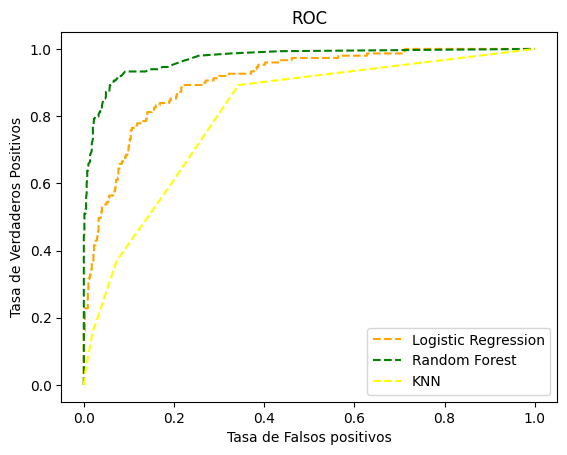

In [105]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr3, tpr3, linestyle = "--", color = "yellow", label = "KNN")


plt.title('ROC')
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos Positivos')

plt.legend(loc = 'best')
plt.show()

In [106]:
#El mejor modelo
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.87      0.77      0.82       149

    accuracy                           0.95       945
   macro avg       0.91      0.88      0.89       945
weighted avg       0.94      0.95      0.94       945

